<a href="https://colab.research.google.com/github/shinnew9/Apziva_practice_code/blob/main/Project4-MonReader/text_to_speech(synthesis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Opening sample data - Kor, Eng

mainly because I dont know Turkish

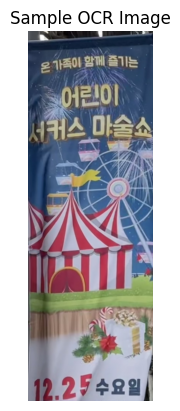

In [ ]:
import pandas as pd
from IPython.display import display
from IPython import get_ipython

from PIL import Image
import io
import matplotlib.pyplot as plt

train_parquet_file = "/content/drive/MyDrive/Apziva/4th_MonReader/korocr/data/train-00000-of-00002.parquet"
df_train_parquet = pd.read_parquet(train_parquet_file)

# print(df_train_parquet.shape)
# display(df_train_parquet.head(5))

# display(train_parquet_file.info(verbose=True, memory_usage='deep'))
# display(df_train_parquet.memory_usage(deep=True))


# 1st image as a sample
image_bytes = df_train_parquet.iloc[0]["image"]["bytes"]
sample_image = Image.open(io.BytesIO(image_bytes)).convert("RGB")

# print matplotlib
plt.imshow(sample_image)
plt.axis("off")  # No axis show
plt.title("Sample OCR Image")
plt.show()

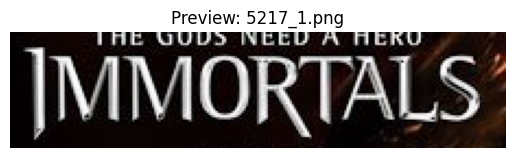

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 경로 설정
sample_english_image_path = "/content/drive/MyDrive/Apziva/4th_MonReader/IIIT5K/test/5217_1.png"

# 이미지 열기
english_sample_image = Image.open(sample_english_image_path)

# 이미지 출력
plt.imshow(english_sample_image)
plt.axis("off")  # 축 숨기기
plt.title("Preview: 5217_1.png")
plt.show()

### TextExtraction with GPT4 (mllm)

#### openai - Package Installation

In [ ]:
pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.91.0
    Uninstalling openai-1.91.0:
      Successfully uninstalled openai-1.91.0


#### Text Extraction for both Kor, Eng

In [ ]:
from google.colab import userdata
import openai
import base64

api_key = userdata.get('openai_api')
openai.api_key = api_key

In [ ]:
import openai
import base64
from PIL import Image
import os

def extract_text_from_image(image_path, prompt="Extract all visible text from this image. Return only raw text, no explanation."):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # image encoding
    with open(image_path, "rb") as image_file:
        base64_image = base64.b64encode(image_file.read()).decode("utf-8")

    # Calling OpenAI Vision API
    response = openai.ChatCompletion.create(
        model="gpt-4o",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}}
                ]
            }
        ],
        max_tokens=1000,
    )

    # Parsing response
    result = response["choices"][0]["message"]["content"]
    return result

In [ ]:
sample_korean_path = "/content/drive/MyDrive/Apziva/4th_MonReader/korocr/data/sample_image_01.png"
sample_english_path = "/content/drive/MyDrive/Apziva/4th_MonReader/IIIT5K/test/5217_1.png"

output_text = extract_text_from_image(sample_korean_path)
output_text2 = extract_text_from_image(sample_english_path)

print("OCR Korean Result:\n", output_text)
print("OCR English Result:\n", output_text2)

OCR Korean Result:
 온 가족이 함께 즐기는
어린이
서커스 마술쇼
12.25 수요일
OCR English Result:
 THE GODS NEED A HERO  
IMMORTALS


### TTS

#### 1 - SESAME

How model works: I refer to this webiste (https://www.sesame.com/research/crossing_the_uncanny_valley_of_voice)



In [ ]:
from google.colab import userdata
from huggingface_hub import login

hf_token = userdata.get("huggingface_pw")  # Colab secrets에서 등록한 이름
login(token=hf_token)

In [ ]:
import torch
from transformers import CsmForConditionalGeneration, AutoProcessor

model_id = "sesame/csm-1b"
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained(model_id)
model = CsmForConditionalGeneration.from_pretrained(model_id).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/449 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/2.00k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.28k [00:00<?, ?B/s]

transformers.safetensors.index.json:   0%|          | 0.00/59.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

transformers-00001-of-00002.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

transformers-00002-of-00002.safetensors:   0%|          | 0.00/2.19G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/264 [00:00<?, ?B/s]

In [ ]:
text2 = "[0] " + output_text2.strip()  # `[0]`은 음성 스피커 ID

inputs2 = processor(text2, add_special_tokens=True, return_tensors="pt").to(device)

audio2 = model.generate(**inputs2, output_audio=True)
processor.save_audio(audio2, "/content/drive/MyDrive/Apziva/4th_MonReader/sample_english_output.wav")

In [ ]:
# Korean doesn't work well, but English works well

text = "[0] " + output_text.strip()  # `[0]`은 음성 스피커 ID

inputs = processor(text, add_special_tokens=True, return_tensors="pt").to(device)

audio = model.generate(**inputs, output_audio=True)
processor.save_audio(audio, "/content/drive/MyDrive/Apziva/4th_MonReader/sample_korean_output.wav")

#### 2 - DIA model
It isn't  matched

I refer to this page: https://github.com/nari-labs/dia.
The DIA model is not designed for speech synthesis, but rather for text-based multi-turn conversations or generating explanations and summaries from text.

##### model download & package installation

In [ ]:
!git clone https://github.com/myshell-ai/OpenVoice.git

Cloning into 'OpenVoice'...
remote: Enumerating objects: 460, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 460 (delta 11), reused 7 (delta 7), pack-reused 445 (from 2)
Receiving objects: 100% (460/460), 3.85 MiB | 17.23 MiB/s, done.
Resolving deltas: 100% (218/218), done.


In [ ]:
%cd OpenVoice
!pip install -r requirements.txt

/content/OpenVoice
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 54.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 69.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 33.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of matplotlib to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of matplotlib to determine which v

In [ ]:
!mkdir -p checkpts
!wget -O checkpts/base_speaker_encoder.pth https://huggingface.co/myshell-ai/OpenVoice/resolve/main/checkpts/base_speaker_encoder.pth
!wget -O checkpts/base_content_encoder.pth https://huggingface.co/myshell-ai/OpenVoice/resolve/main/checkpts/base_content_encoder.pth
!wget -O checkpts/base_vocoder.pth https://huggingface.co/myshell-ai/OpenVoice/resolve/main/checkpts/base_vocoder.pth

--2025-06-30 06:16:50--  https://huggingface.co/myshell-ai/OpenVoice/resolve/main/checkpts/base_speaker_encoder.pth
Resolving huggingface.co (huggingface.co)... 3.166.152.110, 3.166.152.44, 3.166.152.65, ...
Connecting to huggingface.co (huggingface.co)|3.166.152.110|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-30 06:16:50 ERROR 404: Not Found.

--2025-06-30 06:16:50--  https://huggingface.co/myshell-ai/OpenVoice/resolve/main/checkpts/base_content_encoder.pth
Resolving huggingface.co (huggingface.co)... 3.166.152.110, 3.166.152.44, 3.166.152.65, ...
Connecting to huggingface.co (huggingface.co)|3.166.152.110|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-30 06:16:51 ERROR 404: Not Found.

--2025-06-30 06:16:51--  https://huggingface.co/myshell-ai/OpenVoice/resolve/main/checkpts/base_vocoder.pth
Resolving huggingface.co (huggingface.co)... 3.166.152.110, 3.166.152.44, 3.166.152.65, ...
Connecting to huggingface.co (hu

##### Working on sample data

In [ ]:
from inference import infer

# 예제
source_path = "/content/drive/MyDrive/Apziva/4th_MonReader/sample_english_output.wav"  # 화자 음성 (짧은 샘플)
reference_text = output_text2  # 변환할 텍스트 (또는 다른 audio에서 추출한 내용)

# 기본 스타일: 'default', 'angry', 'cheerful', etc.
output_wav = infer(
    source_audio_path=source_path,
    text=reference_text,
    language="en",       # 또는 "ko" 가능
    emotion="default",   # or "cheerful", "angry", etc.
    save_path="/content/drive/MyDrive/Apziva/4th_MonReader/sample_english_output_DIA.wav"
)

ModuleNotFoundError: No module named 'inference'

#### 3- Chatterbox

##### package installation

In [ ]:
!pip install chatterbox-tts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.1/218.1 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━

##### model load

In [ ]:
import torchaudio as ta
from chatterbox.tts import ChatterboxTTS
from IPython.display import Audio

# TTS model load
model = ChatterboxTTS.from_pretrained(device="cuda")   # or use "cpu"

# sample text
text_en = output_text2
text_kor = output_text

# voice generate
wav2 = model.generate(text_en)
wav = model.generate(text_kor)

# save it to file (24 kHz)
# ta.save("/content/drive/MyDrive/Apziva/4th_MonReader/sample_english_chatterbox_output.wav", wav2, model.sr)
ta.save("/content/drive/MyDrive/Apziva/4th_MonReader/sample_english_chatterbox_output.wav", wav, model.sr)

/usr/local/lib/python3.11/dist-packages/diffusers/models/lora.py:393: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)
/usr/local/lib/python3.11/dist-packages/diffusers/models/lora.py:393: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)


loaded PerthNet (Implicit) at step 250,000


/usr/lib/python3.11/contextlib.py:105: FutureWarning: `torch.backends.cuda.sdp_kernel()` is deprecated. In the future, this context manager will be removed. Please see `torch.nn.attention.sdpa_kernel()` for the new context manager, with updated signature.
  self.gen = func(*args, **kwds)
LlamaModel is using LlamaSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.
Sampling:   6%|▌         | 56/1000 [00:02<00:34, 26.97it/s]
/usr/lib/python3.11/contextlib.py:105: FutureWarning: `torch.backends.cuda.sdp_kernel()` is deprecated. In the future, this context manager will be removed. Please see `torch.nn.attention.sdpa_kernel()` for the new context manager, with updated signature.
  s

In [ ]:
# Playing
Audio(wav2.numpy(), rate=model.sr)

In [ ]:
# Playing

# should read this:
# 온 가족이 함께 즐기는 어린이 서커스 마술쇼 12.25 수요일
Audio(wav.numpy(), rate=model.sr)

Chatterbox worked perfectly only for English, so I'm not sure whether this would work well in Turkish?

#### 4- ESPnet TTS
Another model that I tried it but didn't finished. I would move on to mllms.

##### package installation

In [ ]:
!pip install --upgrade numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 121.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
espnet 202412 requires numpy<1.24, but you have numpy 1.26.4 which is incompatible.
chatterbox-tts 0.1.2 requires librosa==0.11.0, but you have librosa 0.9.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install -q espnet_model_zoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.7/524.7 kB 38.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 22.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

##### Model load

In [ ]:
from google.colab import userdata
from huggingface_hub import login

hf_token = userdata.get("huggingface_pw")  # Colab secrets에서 등록한 이름
login(token=hf_token)

In [ ]:
import os
os.environ["NLTK_DATA"] = "/usr/local/share/nltk_data"

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('cmudict')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


True

In [ ]:
# from espnet_model_zoo.downloader import ModelDownloader
# import soundfile as sf

# Download helper
# d = ModelDownloader()

from espnet2.bin.tts_inference import Text2Speech
from IPython.display import Audio

model_tag = "kan-bayashi/ljspeech_tacotron2"

# 모델 로드
text2speech = Text2Speech.from_pretrained(model_tag=model_tag)

# OCR 텍스트 → 음성 합성
wav3 = text2speech(output_text2)["wav"]

# 재생
Audio(wav3.numpy(), rate=22050)

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# 예: Tacotron2 + Parallel WaveGAN (일본어 or 영어 모델)
model = d.download_and_unpack("espnet/kan-bayashi_ljspeech_vits ")
voc_model = d.download_and_unpack("kan-bayashi/ljspeech_parallel_wavegan.v1")

# TTS (텍스트 -> 음성 파형)
import torch
from parallel_wavegan.utils import load_model

# Load Tacotron2 TTS
from espnet2.bin.tts_inference import Text2Speech
text2speech = Text2Speech.from_pretrained(
    model_file=f"{model}/exp/tts_train_tacotron2_raw_phn_none/config.yaml",
    vocoder_file=f"{voc_model}/exp/train_nodev_parallel_wavegan.v1/checkpoint-400000steps.pkl",
    device="cuda" if torch.cuda.is_available() else "cpu"
)

# 텍스트 입력
input_text = "This is a test using ESPnet TTS."

# 음성 생성
wav = text2speech(input_text)["wav"]

# 저장
sf.write("espnet_output.wav", wav.cpu().numpy(), 22050)

HFValidationError: Repo id must use alphanumeric chars or '-', '_', '.', '--' and '..' are forbidden, '-' and '.' cannot start or end the name, max length is 96: 'espnet/kan-bayashi_ljspeech_vits '.